In [1]:

# https://github.com/timestocome


# Lovecraft Corpus
# https://github.com/vilmibm/lovecraftcorpus



In [2]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt

In [3]:
# silence is golden

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action="ignore",category=DeprecationWarning)
warnings.filterwarnings(action="ignore",category=FutureWarning)


In [4]:
# hack to make keras work with 2*** series gpus

import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

In [5]:
from keras import Sequential
from keras.layers import Embedding
from keras.preprocessing.sequence import pad_sequences

from sklearn.manifold import TSNE


Using TensorFlow backend.


In [6]:
# list all files under the input directory
import os

fNames = []
for dirname, _, filenames in os.walk('lovecraftcorpus'):
    for filename in filenames:
        fNames.append(os.path.join(dirname, filename))

print(fNames)
print(len(fNames))

['lovecraftcorpus/beyond_wall_of_sleep.txt', 'lovecraftcorpus/tomb.txt', 'lovecraftcorpus/polaris.txt', 'lovecraftcorpus/moon_bog.txt', 'lovecraftcorpus/pharoahs.txt', 'lovecraftcorpus/nameless.txt', 'lovecraftcorpus/colour_out_of_space.txt', 'lovecraftcorpus/dagon.txt', 'lovecraftcorpus/hypnos.txt', 'lovecraftcorpus/silver_key.txt', 'lovecraftcorpus/lurking_fear.txt', 'lovecraftcorpus/book.txt', 'lovecraftcorpus/terrible_old_man.txt', 'lovecraftcorpus/tree.txt', 'lovecraftcorpus/juan_romero.txt', 'lovecraftcorpus/reanimator.txt', 'lovecraftcorpus/hound.txt', 'lovecraftcorpus/cthulhu.txt', 'lovecraftcorpus/rats_walls.txt', 'lovecraftcorpus/ex_oblivione.txt', 'lovecraftcorpus/medusas_coil.txt', 'lovecraftcorpus/descendent.txt', 'lovecraftcorpus/shadow_out_of_time.txt', 'lovecraftcorpus/temple.txt', 'lovecraftcorpus/cool_air.txt', 'lovecraftcorpus/kadath.txt', 'lovecraftcorpus/dunwich.txt', 'lovecraftcorpus/shunned_house.txt', 'lovecraftcorpus/alchemist.txt', 'lovecraftcorpus/iranon.txt'

In [7]:
# read in all files, split into sentences, do a bit of cleanup to reduce vocabulary size

from nltk.tokenize import sent_tokenize
import functools
import re

stories = []

for f in fNames:
    fp = open(f)
    story = fp.read()
    
    story = story.lower()
    story = re.sub('-', ' ', story)
    story = re.sub(" \'", ' ', story)
    story = re.sub('\"', ' ', story)
    story = re.sub('\d', '9', story)
    
    stories.append(sent_tokenize(story))
    
    
# flatten stories into sentences    
sentences = functools.reduce(lambda x, y: x+y, stories)
n_sentences = len(sentences)


n_stories = len(stories)



In [8]:
# assign a story number as a target for each sentence

targets = []

for i in range(len(stories)):
    n_sent = len(stories[i])
    t = [i] * n_sent
    targets.extend( t )
        
    
print('targets %d data %d' %(len(targets), len(sentences)))

targets 18678 data 18678


In [9]:
# store sentences and targets in a df

train = pd.DataFrame(targets)
train.columns = ['target']
train['sentences'] = sentences

print(train.tail())





       target                                          sentences
18673      66  their deeds i recall not, for they were but of...
18674      66  their aspect i recall dimly, it was like to th...
18675      66  their name i recall clearly, for it rhymed wit...
18676      66         these beings of yesterday were called man.
18677      66  so the genie flew back to the thin horned moon...


In [10]:
# tokenize, vectorize story sentences by story
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.casual import casual_tokenize




tfidf_model = TfidfVectorizer(tokenizer=casual_tokenize)
tfidf_model.fit(raw_documents=train['sentences'])


x = []
y = []


for i in range(n_stories):
    docs = train[train['target'] == i]['sentences']
    t = tfidf_model.transform(docs)
    x.append(t.mean(axis=0).sum())
    y.append(t.mean(axis=1).sum())
   

In [11]:
import re

story_names = []

for i in range(len(fNames)):
    stry = re.search('\/(.*).txt', fNames[i])
    story_names.append('   ' + stry.group(1))
print(story_names)    

['   beyond_wall_of_sleep', '   tomb', '   polaris', '   moon_bog', '   pharoahs', '   nameless', '   colour_out_of_space', '   dagon', '   hypnos', '   silver_key', '   lurking_fear', '   book', '   terrible_old_man', '   tree', '   juan_romero', '   reanimator', '   hound', '   cthulhu', '   rats_walls', '   ex_oblivione', '   medusas_coil', '   descendent', '   shadow_out_of_time', '   temple', '   cool_air', '   kadath', '   dunwich', '   shunned_house', '   alchemist', '   iranon', '   beast', '   martins_beach', '   pickman', '   outsider', '   arthur_jermyn', '   clergyman', '   charles_dexter_ward', '   he', '   festival', '   high_house_mist', '   old_folk', '   from_beyond', '   crawling_chaos', '   redhook', '   poetry_of_gods', '   what_moon_brings', '   dreams_in_the_witch', '   haunter', '   mountains_of_madness', '   other_gods', '   vault', '   doorstep', '   picture_house', '   street', '   unnamable', '   white_ship', '   ulthar', '   erich_zann', '   sarnath', '   ce

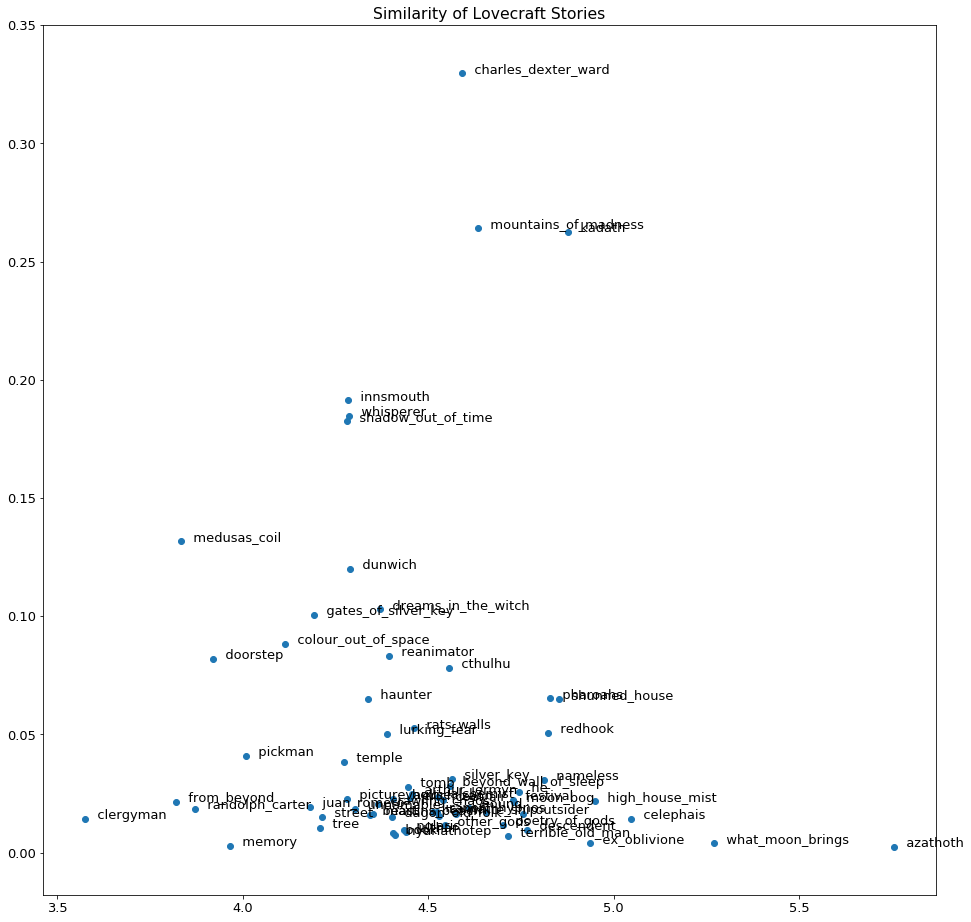

In [12]:
import matplotlib.pyplot as plt


font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 13}

plt.rc('font', **font)

fig, ax = plt.subplots(figsize=(16,16))
ax.scatter(x, y)

# label points
n = np.arange(0, n_stories)

for i, txt in enumerate(story_names):
#for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))
    
    
plt.title('Similarity of Lovecraft Stories')

plt.show()